In [40]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [41]:
# sns.set_theme(style="darkgrid")

In [42]:
df = pd.read_csv('out/results_weak_omp.csv')
df.sort_values(by=['base_res'], inplace=True, ascending=False)
df

,cpus,res,base_res,time,run
239,64,2048,256,26.787700,20
199,4,512,256,3.885190,20
180,4,512,256,4.057520,1
182,4,512,256,4.142900,3
183,4,512,256,3.544290,4
...,...,...,...,...,...
55,16,256,64,0.703759,16
56,16,256,64,2.425640,17
57,16,256,64,0.632959,18
58,16,256,64,0.472074,19


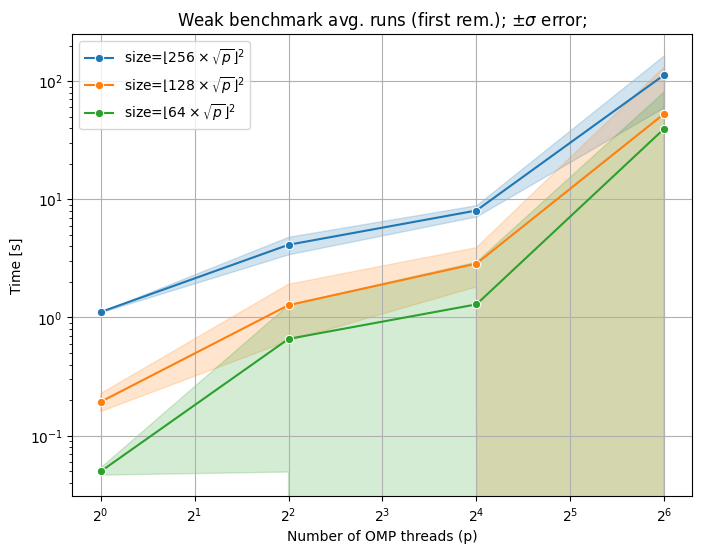

In [43]:
# weak scaling
plt.figure(figsize=(8, 6))

def plot_weak(data, label):

    data = data.drop(data[data["run"] == 1].index)

    # plot using seaborn lineplot
    sns.lineplot(x="cpus", y="time", data=data, errorbar="sd", marker="o", label=label)

for base_size in df["base_res"].unique():
    plot_weak(df[df["base_res"] == base_size], fr"size=$\lfloor {{{base_size}}} \times \sqrt{{p}}\rfloor^2$")

plt.xlabel("Number of OMP threads (p)")
plt.ylabel("Time [s]")
plt.grid(True)
plt.xscale('log', base=2)
plt.yscale('log')

plt.title(f"Weak benchmark avg. runs (first rem.); $\pm\sigma$ error;")

plt.savefig(f"../../report/plots/mini_app/weak_omp.svg")

plt.show()


base_size: 256
1.112098947368421
base_size: 128
0.19341542105263157
base_size: 64
0.049815557894736844


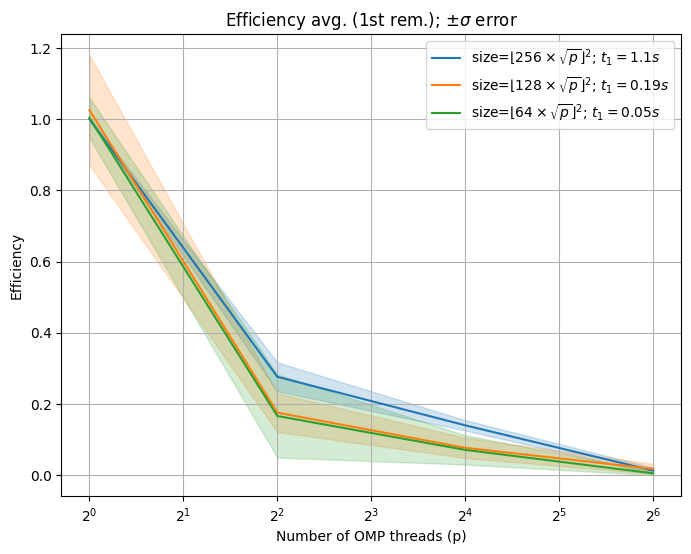

In [44]:
# plot weak scaling efficiency
plt.figure(figsize=(8, 6))

def plot_weak_efficiency(data: pd.DataFrame, label):

    data = data.drop(data[data["run"] == 1].index)

    t_1 = data.groupby("cpus")["time"].mean().iloc[0]
    print(f"base_size: {data['base_res'].iloc[0]}") 
    print(t_1)
    # print(data["time"])
    # t(1) / t(p)

    data["efficiency"] = t_1 / data["time"]
    sns.lineplot(x="cpus", y="efficiency", data=data, 
                 # marker="o", 
                 label=fr"{label}; $t_1={t_1:.2}s$", 
                 errorbar="sd"
                 )


for base_size in df["base_res"].unique():
    plot_weak_efficiency(df[df["base_res"] == base_size], fr"size=$\lfloor {{{base_size}}} \times \sqrt{{p}}\rfloor^2$")


plt.xlabel("Number of OMP threads (p)")
plt.ylabel("Efficiency")
plt.legend()
# plt.ylim(0, 1.1)
plt.xscale('log', base=2)
plt.grid(True)

plt.title(fr"Efficiency avg. (1st rem.); $\pm\sigma$ error")

plt.savefig(f"../../report/plots/mini_app/efficiency_omp.svg")

plt.show()